# Датасет [WIDER FACES](http://shuoyang1213.me/WIDERFACE/)


In [49]:
from scipy import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [2]:
path_mat = 'WiderFaces/wider_face_train.mat'
path_images = 'C:/Users/Fedor/Documents/Projects/BelkaFaces/WiredFaces/WIDER_train/All'

In [13]:
mat = io.loadmat(path_mat)

### Список всех файлов

In [22]:
all_files = mat['file_list']

### Список всех координат лиц

In [23]:
all_boxes = mat['face_bbx_list']

## Пример изображений в датасете

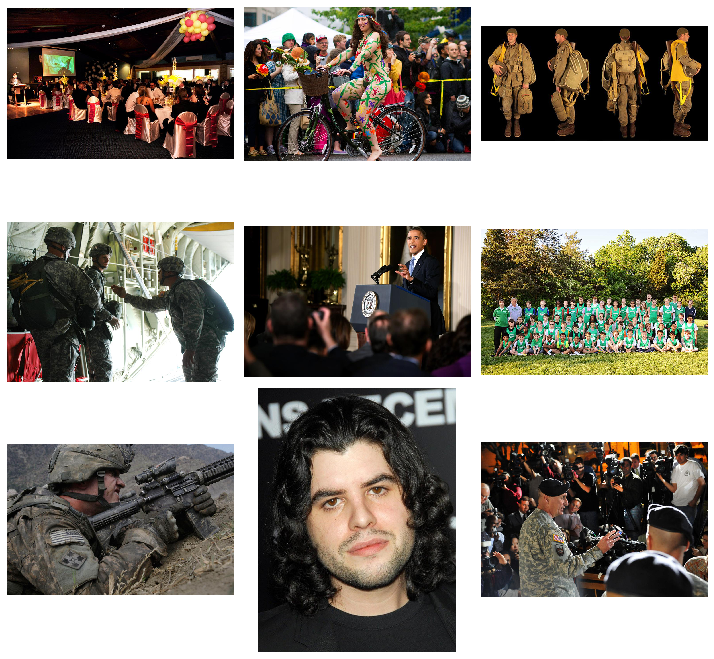

In [334]:
display_images(choose_random_images())

## Получим данные об изображениях в датасете

### Выберем рандомное изображение

In [325]:
random_image = choose_random_images(n=1)[0]
random_image

'40_Gymnastics_Gymnastics_40_578.jpg'

### Его номер в датасете 

In [326]:
folder, file = get_num_of_image(random_image)

Folder: 35 
File: 60


### Координаты лиц на изображении

In [327]:
boxes = get_boxes(folder, file)
boxes

array([[ 55, 214,  39,  38],
       [140, 251,  35,  40],
       [228, 274,  36,  40],
       [257, 237,  35,  38],
       [241, 192,  36,  42],
       [325, 278,  36,  42],
       [349, 222,  36,  38],
       [422, 281,  38,  43],
       [450, 232,  38,  45],
       [569, 221,  48,  48],
       [538, 285,  38,  48],
       [646, 290,  40,  45],
       [753, 153,  41,  48],
       [697, 222,  39,  49],
       [864, 166,  46,  54],
       [762, 297,  38,  43],
       [885, 310,  40,  48]])

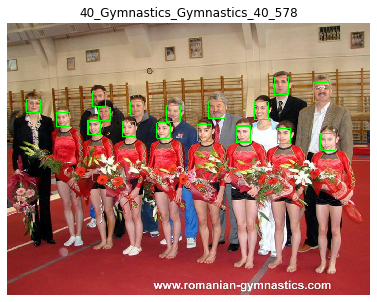

In [328]:
draw_rect(random_image, boxes)

## Helpers


In [27]:
def convert2RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [15]:
def choose_random_images(path=path_mat, n=10):
    images = []
    mat = io.loadmat(path)
    for _ in range(n):
        folder = random.choice(all_files)
        name = random.choice(folder[0])[0][0]
        images.append(name + ".jpg")
    return images

In [16]:
def get_num_of_image(name):
    folder_num = -1 
    file_num = -1
    for folder in all_files:
        folder_num += 1
        file_num = -1
        for file_name in folder[0]:
            file_num += 1
            name_ = file_name[0][0]
            if (name_ + '.jpg' == name):
                # print("Folder: {0} \nFile: {1}".format(folder_num, file_num))
                return folder_num, file_num    

In [17]:
def get_boxes(folder, file):
    return all_boxes[folder][0][file][0]

In [18]:
def get_all_boxes(images):
    boxes = []
    for image in images:
        folder, file = get_num_of_image(image)
        boxes.append(get_boxes(folder, file))
    return boxes

In [28]:
def draw_rect(image, boxes):
    test_image = cv2.imread(path_images + '//' + image)
    img_copy = np.copy(test_image)
    
    for (x, y, w, h) in boxes:
        cv2.rectangle(img_copy,(x, y), (x+w, y+h), (0, 255, 0), 2)
        
    fig,ax = plt.subplots(1)
    fig.set_size_inches(9, 5)
    ax.set_title(image.split('.')[0])
    ax.imshow(convert2RGB(img_copy))
    plt.axis('off')
    plt.show()

In [29]:
def display_images(images):
    fig=plt.figure(figsize=(10, 10))
    columns = 3
    rows = 3
    for i in range(1, columns*rows +1):
        test_image = cv2.imread(path_images + '//' + images[i])
        img_copy = np.copy(test_image)
        
        fig.add_subplot(rows, columns, i)
        plt.imshow(convert2RGB(img_copy))
        plt.axis('off')
        plt.tight_layout(True)
    plt.show()
    

# Тестирование решений

**Как будем тестировать?** 

1. Выбираем рандомные n изображений из датасета
2. Получаем координаты всех лиц на всех изображениях 
3. Получаем результаты работы методов на этих изображениях, т.е. получаем координаты лиц
4. Сравниваем полученные результаты с реальными координатами 
5. Считаем среднюю ошибку по координатам. Сортируем методы по возрастанию ошибки
   1. Если метод не дал координат лица (не обнаружил лицо), то добавляем n-m нулевых векторов, где n - количество лиц на изображении, m - количество обнаруженных лиц.

### N рандомных изображений

In [30]:
images = choose_random_images(n=100)

### Координаты лиц

In [31]:
boxes = get_all_boxes(images)

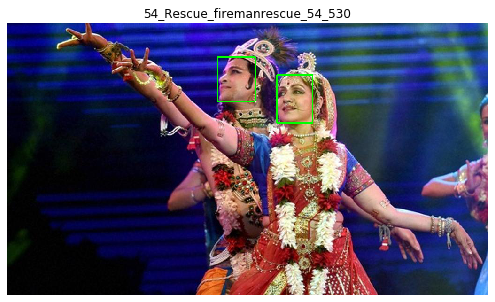

In [43]:
r = random.choice(range(0,100))
draw_rect(images[r], boxes[r])

### Сравнение координат лиц
Для каждого обнаруженного лица в каждой картинке строим евклидову норму (сравнивая с реальными координатами). Итеррируясь по картинкам, считаем ошибку работы текущего метода. 

In [76]:
def mean_error(results, boxes=boxes):
    
    error = 0
    
    # results -- массив массивов координат лиц
    for i in range(0, len(boxes)):
        
        # Кол-во лиц на i картинке
        num_faces = len(boxes[i])
        
        # Дополняем нулевыми векторами,
        # Если лиц обнаружено меньше
        while(len(results[i]) < num_faces):
            resultse[i].append(np.zeros(4))
        
        for j in range(0, num_faces):
            # Реальные координаты j лица на i картинке
            a = boxes[i][j]
            
            # Координаты j лица на i картинке из метода
            b = results[i][j]
        
            # Евклидова метрика (насколько близки вектора)
            dist = np.linalg.norm(a-b)  
            
            # Ошибка
            error += dist
            
    return error

In [65]:
np.linalg.norm(np.zeros(4) - 1)

2.0

## Каскады Хаара и LBP ([OpenCV](https://github.com/opencv/opencv))

In [52]:
cascades_path = 'HaarCascades'
cascades = os.listdir(cascades_path)
cascades

['haarcascade_frontalface_alt.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_profileface.xml']

In [54]:
lbp_path = 'LBPCascades'
lbps = os.listdir(lbp_path)
lbps

['lbpcascade_frontalface.xml',
 'lbpcascade_frontalface_improved.xml',
 'lbpcascade_profileface.xml']

In [79]:
results_cascade = []
for image in images:
    detect_fa

NameError: name 'detect_fa' is not defined

In [80]:
def detect_faces(cascade, colored_img, scaleFactor=1.1):

    img_copy = np.copy(colored_img)
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(
        gray, scaleFactor=scaleFactor, minNeighbors=5)

    return faces

In [496]:
detect_faces(cascade, cv2.imread(path_images + '//' + images[0]))

(array([[[157, 239, 164],
         [157, 239, 164],
         [157, 239, 164],
         ...,
         [161, 207, 184],
         [161, 207, 184],
         [161, 207, 184]],
 
        [[157, 239, 164],
         [157, 239, 164],
         [157, 239, 164],
         ...,
         [161, 207, 184],
         [161, 207, 184],
         [161, 207, 184]],
 
        [[157, 239, 164],
         [157, 239, 164],
         [157, 239, 164],
         ...,
         [161, 207, 184],
         [161, 207, 184],
         [161, 207, 184]],
 
        ...,
 
        [[ 63,  32,  29],
         [ 63,  32,  29],
         [ 64,  33,  30],
         ...,
         [ 47,  41,  28],
         [ 47,  41,  28],
         [ 47,  41,  28]],
 
        [[ 62,  33,  29],
         [ 62,  33,  29],
         [ 63,  34,  30],
         ...,
         [ 47,  41,  28],
         [ 47,  41,  28],
         [ 47,  41,  28]],
 
        [[ 62,  33,  29],
         [ 62,  33,  29],
         [ 63,  34,  30],
         ...,
         [ 47,  41,  28],
  

## [FaceNet’s MTCNN](https://github.com/davidsandberg/facenet/tree/master/src/align)

In [497]:
def detect_faces(img):
    start_time = time.time()
    detector = MTCNN()
    
    faces = detector.detect_faces(img)
    work_time = round(time.time() - start_time, 3)
    return faces, work_time 

## [dlib's HOG](http://dlib.net/)

## [dlib's MMOD](http://dlib.net/)